<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Convolutional Neural Networks
              
</p>
</div>

DS-NTL-010824<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Learning Goals

- describe the types of layers that are distinctive for convolutional nets;
- utilize `tensorflow` to build CNNs;
- evaluate CNN models.

#### Convolution Neural Networks (CNNs)
- An architecture designed for visual pattern recognition
- Classification/regression on image data

From [Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network):

- "CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. However, CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns."
<br/>
<br/>
- "Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field."

Why a new architecture?

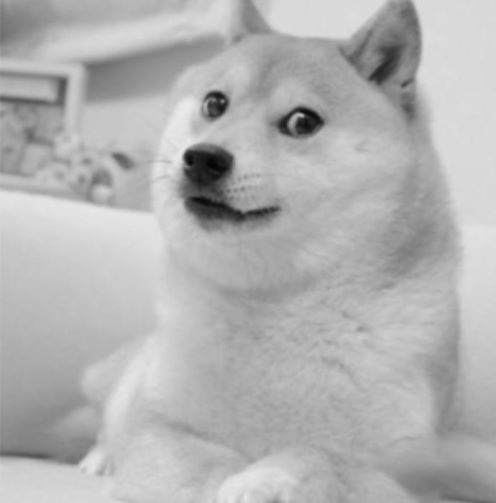

In [2]:
dogey = Image.open("Images/dog.jpg")
dogey_grayscale = ImageOps.grayscale(dogey)
display(dogey_grayscale)

In [3]:
dg_array = np.array(dogey_grayscale)
dg_array

array([[154, 150, 149, ..., 217, 216, 216],
       [153, 149, 147, ..., 217, 216, 216],
       [150, 146, 145, ..., 217, 216, 216],
       ...,
       [214, 214, 213, ..., 127, 128, 129],
       [214, 213, 213, ..., 120, 122, 123],
       [213, 213, 212, ..., 116, 118, 120]], dtype=uint8)

Pixel values: high local correlations across columns/rows.

The problem with standard neural network (aka multilayer perceptron network):
- let's flatten the doge and inspect features.

In [4]:
flattened_input = np.ravel(dg_array)
len(flattened_input)

249488

All those features go in to MLP:


<center><img src = "Images/mlp_image.jfif" width =600/></center>
<center> Number of weights to first layer: huge

Treats features as independent:
- Large number of features.
- Dense connections: large number of weights to tune
- Weights trying to learn pixel-level correlations

Not a good idea. Too specific.

Want to start model at a much higher level of feature abstraction

#### Building up the convolutional network

The two distinctive types of layer inside of a typical CNN (and there may be several of each in a single network) are **convolutional** and **pooling** layers. Let's look at each in turn.


#### Convolution
Convolutional nets employ [convolutions](https://en.wikipedia.org/wiki/Convolution), which are a certain kind of transformation. In the context of neural networks processing images, this can be thought of as sliding a filter (of weights) over the image matrix to produce a new matrix of values. (We'll detail the calculation below.) The relative smallness of the filter means both that there will be relatively few parameters to learn and that the values representing certain areas of the image will be affected only by the values of *nearby areas*. This helps the network in **feature detection**. Let's check out some visualizations [here](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/).


<center><img src = "Images/mlp-convolution-transform.webp" width = 800>

Cutting connections: 
- not all pixel-pixel interactions relevant.
- only pass neighboring pixels into given node at next layer.

**Keeps information local**

<img src = "Images/convolution-mlp-mapping.webp" >

Full computation corresponds to **convolution**

$$ \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{bmatrix} *
\begin{bmatrix}
w_1 & w_2 \\
w_3 & w_4
\end{bmatrix} = \\
\begin{bmatrix}
w_1x_{11} + w_2x_{12} + w_3x_{21} + w_4x_{22} & w_1x_{12} + w_2x_{13} + w_3x_{22} + w_4x_{23} \\
w_1x_{21} + w_2x_{22} + w_3x_{31} + w_4x_{32} & w_1 x_{22} + w_2x_{23} + w_3x_{32} + w_4x_{33}
\end{bmatrix}$$


<center><img src = "Images/convolution-mlp-mapping.webp" width = 400 ></center>


Single node: element-wise multiplication and add them up.
- A dot product between shared weights and relevant local inputs.

Convolution in non-flattened output representation:
- Sliding window with element-wise multiplication/sum
- Creates new image (2D matrix).

<center><img src = "Images/convolution.gif" ></center>

<center><img src = "Images/convolution-mlp-mapping.webp" width = 400 ></center>

<center><img src = "Images/filter.gif" ></center>

<center><img src = "Images/stride1.gif" ></center>

<center><img src = "Images/stride2.gif" ></center>

# Padding 

<center><img src = "Images/paddingwithstride1.gif" ></center>

Why applying same weights for the different computations?

**Weight sharing:**

Idea is that same set of weight patterns useful throughout image:
- the same kinds of correlations keep showing up across different local regions.

<img src = "Images/convolution-mlp-mapping.webp" >

Learned weights acts as filter:
- regions with no vertical edge are zero.
- regions with vertical edge register value.
- useful in many local areas of image

**Same weight set applied to many local areas**

<img src = "Images/edge_detector_large.png" >

Other useful lower-level image features (benefiting from weight sharing):

- Corner/special points
- region/blob detection

<img src = "Images/corner_blobs.jpg" >

Much higher level features:
- don't need to model pixel level structure

With colors we have three color dimensions (R/G/B):
- Filter has three channels (R/G/B)
- R channel applies a weight set to red intensity pixel values
- G channel applies another weight set to green, ...

- Element-wise multiplication/addition channel-wise
- Add result from all channels together.

<img src = "Images/convwithcolor.png" >

- Can manually construct sets of filters and feature engineer.
- But main idea of CNN is to *learn* these filters.
- Given weight matrix feature engineers: CNN learning image feature extraction.

Typically, want to learn multiple filters at the same time:
- Apply each filter/convolve on inputs seperately.
- Creates stacked output (3D numpy array)

Multiple filters with colors:
- Each filter has number of channels
- Equaling depth of input layer.

Depth of output is equal to number of filters.

<img src = "Images/convcolormultifilters.png"  >

After each convolution operation: 
- apply nonlinear activation to output elementwise.

<img src = "Images/conv_activation.png" >

Utkarsh Sinha shows us some examples of different kinds of filters [here](http://aishack.in/tutorials/convolutions/).


In words: Line up the filter with the image, multiply all the corresponding pairs and then add up those products. Repeat for all positions of the filter as allowed by [the stride and the padding](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/). The relative position of the filter to the image will tell you which entry in the resultant matrix you're filling in.

# Recap

Convolutional Layers (Convolution): Convolution is the core operation in CNNs. These layers apply small filters (also called kernels) to the input image. Each filter scans through the image, performing a mathematical operation called convolution. This operation helps detect various features like edges, textures, and shapes. Multiple filters are used in each convolutional layer, and they generate feature maps.

# Pooling

What is pooling? The main goal in inserting a pooling layer is to reduce dimensionality, which helps to reduce both network computation and model overfitting. This is generally a matter of reducing a matrix or tensor of values to  some smaller size, and the most common way of doing this is by partitioning the large matrix into $n$ x $n$ blocks and then replacing each with the largest value in the block. Hence we speak of "MaxPooling".


#### Subsampling/aggregation: pooling layers

- Pooling performs aggregation within window.
- Stride pooling window across input.
- Returns reduced representation.


*Most common aggregation*: **max pooling**

<img src = "Images/maxpool.gif" >

**Intuition behind max pooling**
- Reducing representation size.
- Max: selecting on most distinctive feature.
- Makes insensitive to translation/rotation of features.

<img src = "Images/maxpool.gif" >

<center><img src = "Images/translation_invariance_maxpool.jpg" ></center>

Repeated convolution/pooling:
- Creates smaller feature maps laterally but more of them.
- Encodes higher level features and condenses info.

<img src = "Images/conv_manyfilters.png" />

Putting it together: a schematic CNN on a color image.

<img src = "Images/colorcnn.png" >

<img src = "Images/conv_with_pooling_network.jpeg" >

Final steps involves flattening/connecting to dense fully-connected network:
- take high level condensed features.
- learn correct combinations of them.
- put into sigmoid/softmax

<img src = "Images/conv_with_pooling_network.jpeg" >

Apply this to the MNIST digit recognition problem:

Some old imports:

In [5]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

2024-03-19 09:02:59.834681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The new layers

In [6]:
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

Load MNIST

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
train_labels = to_categorical(train_labels)

Conv2D takes tensors of shape:
- (image_height, image_width, color_channels) for each image
- MNIST has one color channel (grayscale).

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [12]:
train_images.shape
train_labels.shape

(60000, 10)

Normalize data

In [13]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255, test_images / 255

Create the CNN sequential model.

In [14]:
model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
# COv2D input shape =(image_height, image_width, color_channels) for each image
model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
# max pool in 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

2024-03-19 09:03:08.833689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let display the architecture of our model so far.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#### Compile and train the model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [17]:
history_cnn = model.fit(train_images, train_labels, epochs= 20, validation_split = 0.2, batch_size=32, verbose = 2)

Epoch 1/20
1500/1500 - 12s - loss: 0.1646 - accuracy: 0.9490 - val_loss: 0.0746 - val_accuracy: 0.9787 - 12s/epoch - 8ms/step
Epoch 2/20
1500/1500 - 12s - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0596 - val_accuracy: 0.9827 - 12s/epoch - 8ms/step
Epoch 3/20
1500/1500 - 11s - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0435 - val_accuracy: 0.9889 - 11s/epoch - 8ms/step
Epoch 4/20
1500/1500 - 12s - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0500 - val_accuracy: 0.9852 - 12s/epoch - 8ms/step
Epoch 5/20
1500/1500 - 11s - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0499 - val_accuracy: 0.9870 - 11s/epoch - 8ms/step
Epoch 6/20
1500/1500 - 11s - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0433 - val_accuracy: 0.9888 - 11s/epoch - 8ms/step
Epoch 7/20
1500/1500 - 11s - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0499 - val_accuracy: 0.9875 - 11s/epoch - 7ms/step
Epoch 8/20
1500/1500 - 11s - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0458 - val_accuracy: 0.9895 - 11s/epoch - 7

#### Evaluate the model

In [18]:
_, test_acc = model.evaluate(test_images, to_categorical(test_labels), verbose =2)

313/313 - 1s - loss: 0.0500 - accuracy: 0.9906 - 945ms/epoch - 3ms/step


In [19]:
print(test_acc)

0.9905999898910522


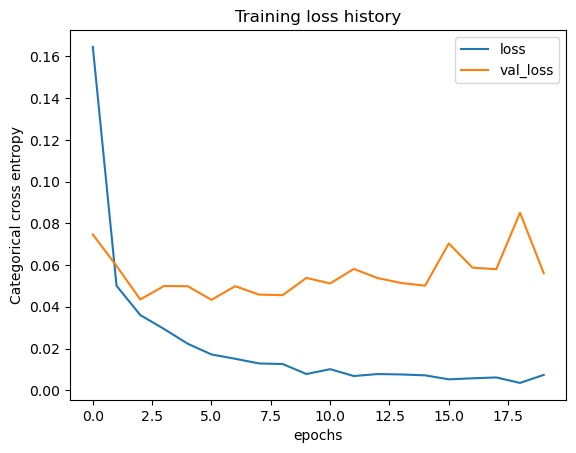

In [20]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

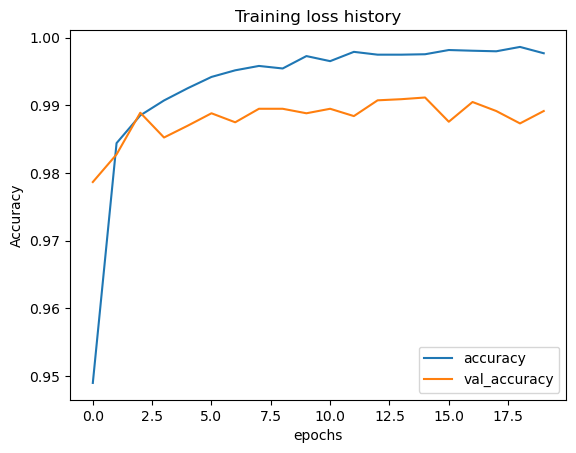

In [21]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Overfitting has occurred: further training is not improving the validation scores in anyway.

Can we improve this by regularization techniques?
- typically we add dropout and L2 regularization after the convolutional layers

In [22]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [23]:
model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1), kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))

model2.add(BatchNormalization())

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [24]:
history_reg = model2.fit(train_images, train_labels, epochs= 50, validation_split = 0.2, batch_size=64)

Epoch 1/50
750/750 [==============================] - 13s 16ms/step - loss: 0.2915 - accuracy: 0.9314 - val_loss: 0.1564 - val_accuracy: 0.9682
Epoch 2/50
750/750 [==============================] - 12s 16ms/step - loss: 0.1298 - accuracy: 0.9789 - val_loss: 0.0943 - val_accuracy: 0.9874
Epoch 3/50
750/750 [==============================] - 12s 16ms/step - loss: 0.1076 - accuracy: 0.9842 - val_loss: 0.0889 - val_accuracy: 0.9886
Epoch 4/50
750/750 [==============================] - 12s 16ms/step - loss: 0.0954 - accuracy: 0.9859 - val_loss: 0.0875 - val_accuracy: 0.9880
Epoch 5/50
750/750 [==============================] - 12s 16ms/step - loss: 0.0888 - accuracy: 0.9865 - val_loss: 0.0847 - val_accuracy: 0.9883
Epoch 6/50
750/750 [==============================] - 12s 16ms/step - loss: 0.0827 - accuracy: 0.9879 - val_loss: 0.1062 - val_accuracy: 0.9815
Epoch 7/50
750/750 [==============================] - 12s 16ms/step - loss: 0.0790 - accuracy: 0.9889 - val_loss: 0.0785 - val_accuracy:

In [25]:
_, test2_acc = model2.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9913


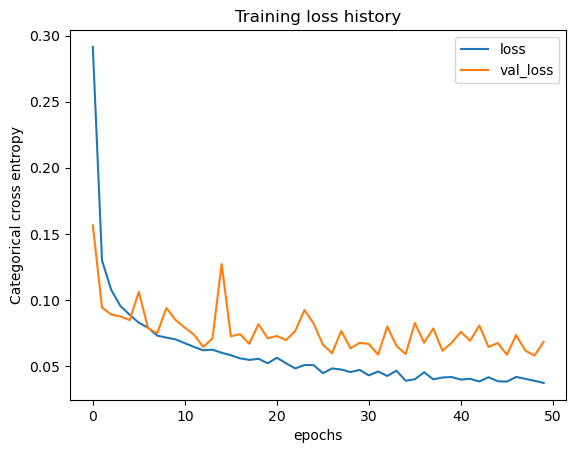

In [26]:
train_regcnn_history = pd.DataFrame(history_reg.history)
train_regcnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_regcnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

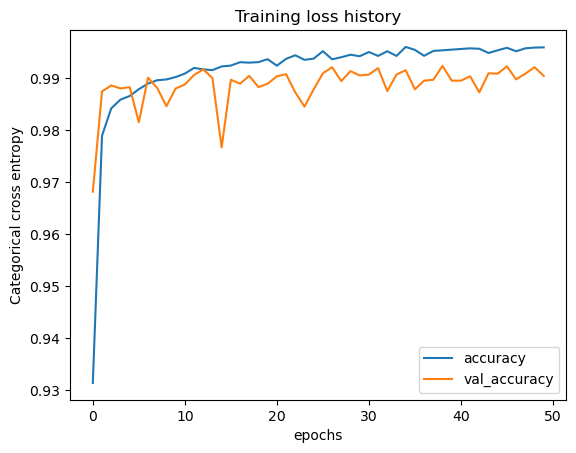

In [27]:
train_regcnn_history = pd.DataFrame(history_reg.history)
train_regcnn_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_regcnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

Changing architecture: simple CNN 
- really high test accuracy.
- slight overfitting but still good. 

To do much better: many orders of magnitude higher complexity to networks
- very deep networks required
- need regularization (L2/dropout)
- other techniques (batchnorm, skip connections, 1D convolutions etc.)

Many highly successful pre-trained models exist that can be leveraged:
- VGG16
- Resnets
- Inception Networks

**Or also just need more data.**

# Transfer Learning

Transfer learning is a machine learning technique where a model trained on one task is adapted or fine-tuned for a related but different task. Instead of training a neural network or another machine learning model from scratch, transfer learning starts with a pre-trained model that has already learned useful features or representations from a large dataset and leverages these learned features to improve performance on a new, target task.

### Advantages
Reduced Training Time: Pre-training on a large dataset can be computationally expensive and time-consuming. Transfer learning allows you to start with a model that has already learned useful features, reducing the time required for training on the target task.

Improved Generalization: Models that have been pre-trained on diverse data tend to have better generalization capabilities. Transfer learning leverages this property to enhance performance on new tasks, even with limited training data.

Effective Use of Small Datasets: When you have a small dataset for your target task, transfer learning can be particularly beneficial because it allows you to leverage knowledge from the pre-trained model, which has seen much more data.

https://towardsdatascience.com/beginners-guide-to-transfer-learning-on-google-colab-92bb97122801

https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a


https://www.tensorflow.org/tutorials/images/transfer_learning